In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # For Data visualization library

In [3]:
df = pd.read_csv('/content/Adidas_Salesdata.csv')
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Gender Type,Product Category,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,"Tuesday, October 26, 2021",Northeast,Pennsylvania,Philadelphia,Men,Apparel,55,125,68750,24062.5,0.35,Outlet
1,Foot Locker,1185732,"Wednesday, October 27, 2021",Northeast,Pennsylvania,Philadelphia,Women,Apparel,45,225,101250,30375.0,0.30,Outlet
2,Foot Locker,1185732,"Thursday, October 28, 2021",Northeast,Pennsylvania,Philadelphia,Men,Street Footwear,45,475,213750,117562.5,0.55,Outlet
3,Foot Locker,1185732,"Friday, October 29, 2021",Northeast,Pennsylvania,Philadelphia,Men,Athletic Footwear,45,125,56250,19687.5,0.35,Outlet
4,Foot Locker,1185732,"Saturday, October 30, 2021",Northeast,Pennsylvania,Philadelphia,Women,Street Footwear,35,175,61250,24500.0,0.40,Outlet


In [4]:
#basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9648 non-null   object 
 1   Retailer ID       9648 non-null   int64  
 2   Invoice Date      9648 non-null   object 
 3   Region            9648 non-null   object 
 4   State             9648 non-null   object 
 5   City              9648 non-null   object 
 6   Gender Type       9648 non-null   object 
 7   Product Category  9648 non-null   object 
 8   Price per Unit    9648 non-null   int64  
 9   Units Sold        9648 non-null   int64  
 10  Total Sales       9648 non-null   int64  
 11  Operating Profit  9648 non-null   float64
 12  Operating Margin  9648 non-null   float64
 13  Sales Method      9648 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 1.0+ MB


In [5]:
# Data Summary
df.describe()

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,45.216625,256.930037,93273.437500,34425.244761,0.422991
std,2.636038e+04,14.705397,214.252030,141916.016727,54193.113713,0.097197
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,110.000000,1275.000000,825000.000000,390000.000000,0.800000


In [6]:
# Missing Values
df.isnull().sum()

,0
Retailer,0
Retailer ID,0
Invoice Date,0
Region,0
State,0
City,0
Gender Type,0
Product Category,0
Price per Unit,0
Units Sold,0


In [7]:
# Convert Invoice Date to datetime
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Gender Type       9648 non-null   object        
 7   Product Category  9648 non-null   object        
 8   Price per Unit    9648 non-null   int64         
 9   Units Sold        9648 non-null   int64         
 10  Total Sales       9648 non-null   int64         
 11  Operating Profit  9648 non-null   float64       
 12  Operating Margin  9648 non-null   float64       
 13  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), fl

In [10]:
# 1. Sales by Product Category
product_sales = df.groupby('Product Category')['Total Sales'].sum().sort_values(ascending=False)

In [12]:
# Sales by Retailer
retailer_sales = df.groupby('Retailer')['Total Sales'].sum().sort_values(ascending=False)

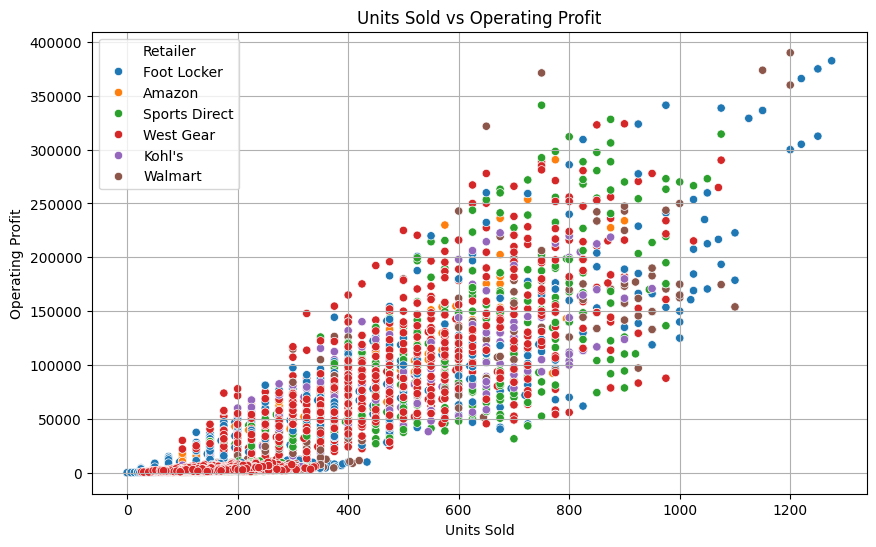

In [15]:
# Units Sold vs Operating Profit
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Units Sold', y='Operating Profit', hue='Retailer')
plt.title('Units Sold vs Operating Profit')
plt.grid(True)
plt.show()

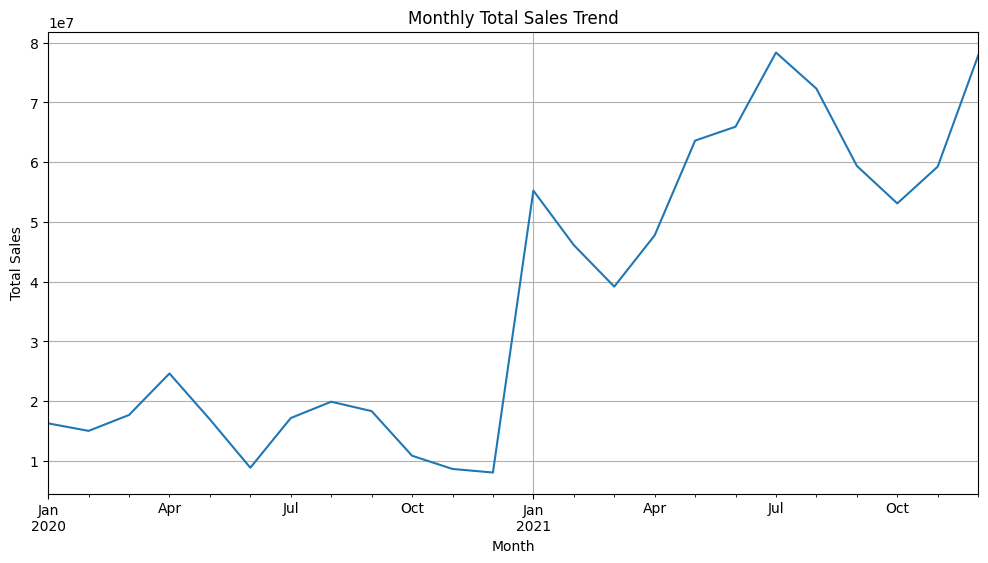

In [16]:
# Sales over time
df['Month'] = df['Invoice Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total Sales'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot()
plt.title('Monthly Total Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

<ipython-input-40-a0beaab4f983>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="crest")


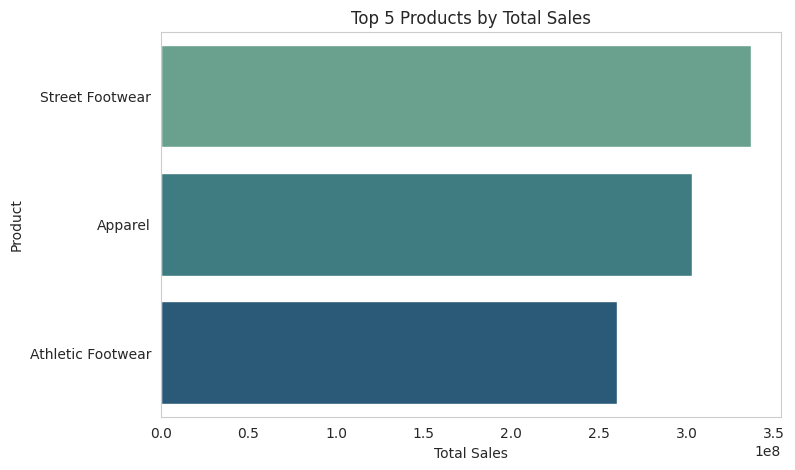

In [40]:
plt.figure(figsize=(8,5))
sns.barplot(x=top_products.values, y=top_products.index, palette="crest")
plt.title('Top 5 Products by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.grid(axis='x')

plt.show()

In [22]:
# Top Products
top_products = product_sales.head(5)
print("\nTop Products by Total Sales:")
print(top_products)


Top Products by Total Sales:
Product Category
Street Footwear      336829057
Apparel              302767492
Athletic Footwear    260305576
Name: Total Sales, dtype: int64


<ipython-input-31-df961e262640>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=retailer_sales.index, y=retailer_sales.values, palette='viridis')


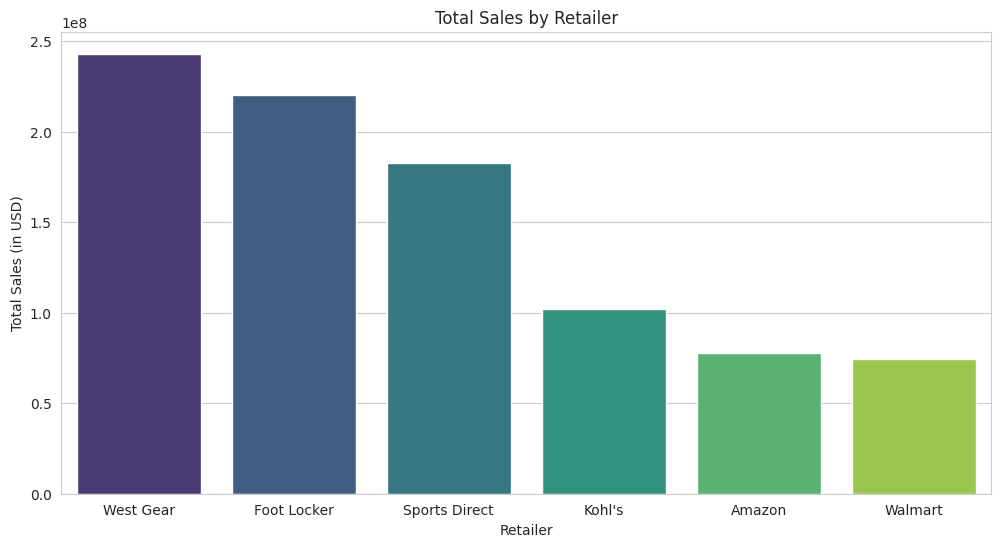

In [31]:
# Total Sales by Retailer
sns.set_style('whitegrid')

# Create the barplot
plt.figure(figsize=(12,6))
sns.barplot(x=retailer_sales.index, y=retailer_sales.values, palette='viridis')

# Add titles and labels
plt.title('Total Sales by Retailer')
plt.xlabel('Retailer')
plt.ylabel('Total Sales (in USD)')

plt.show()

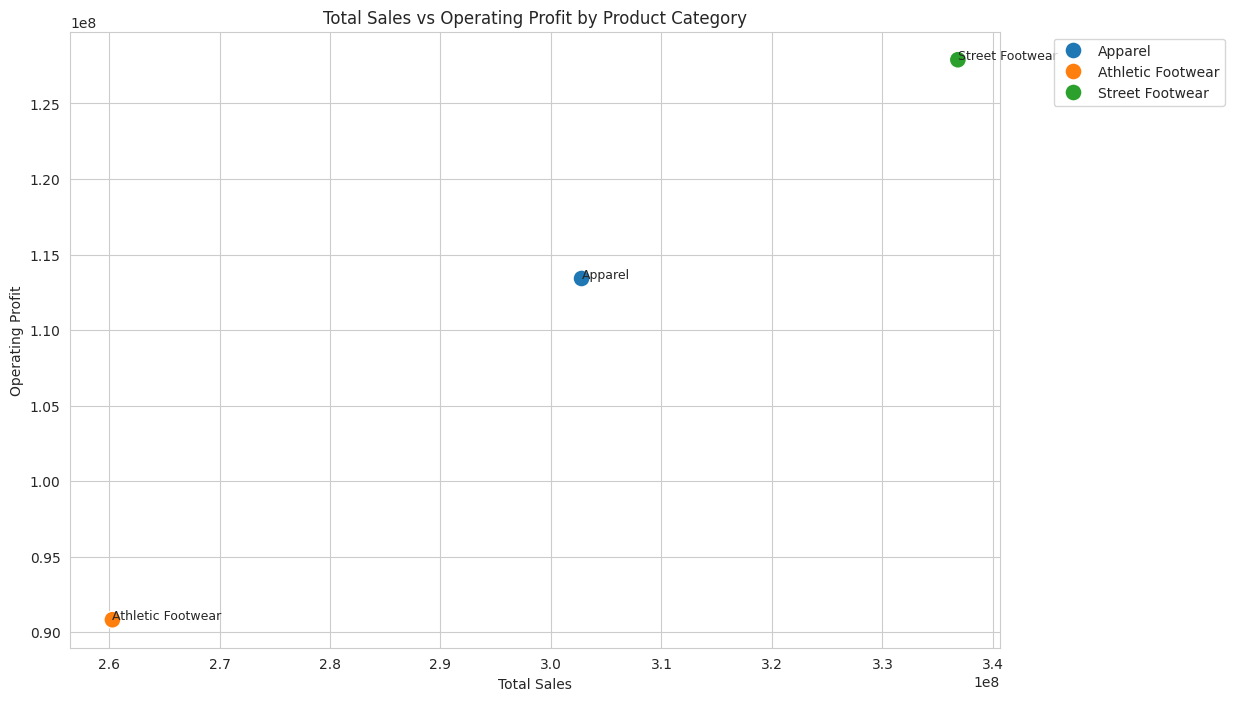

In [46]:
# Group by Product to get total sales and operating profit
product_summary = df.groupby('Product Category')[['Total Sales', 'Operating Profit']].sum().reset_index()

# Plot Total Sales vs Operating Profit
plt.figure(figsize=(12,8))
sns.scatterplot(data=product_summary, x='Total Sales', y='Operating Profit', hue='Product Category', s=150)

# Add labels to points
for index, row in product_summary.iterrows():
    plt.text(row['Total Sales'] + 500,
             row['Operating Profit'],
             row['Product Category'],
             fontsize=9)

plt.title('Total Sales vs Operating Profit by Product Category')
plt.xlabel('Total Sales')
plt.ylabel('Operating Profit')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<ipython-input-45-61d095c4867f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette="viridis")


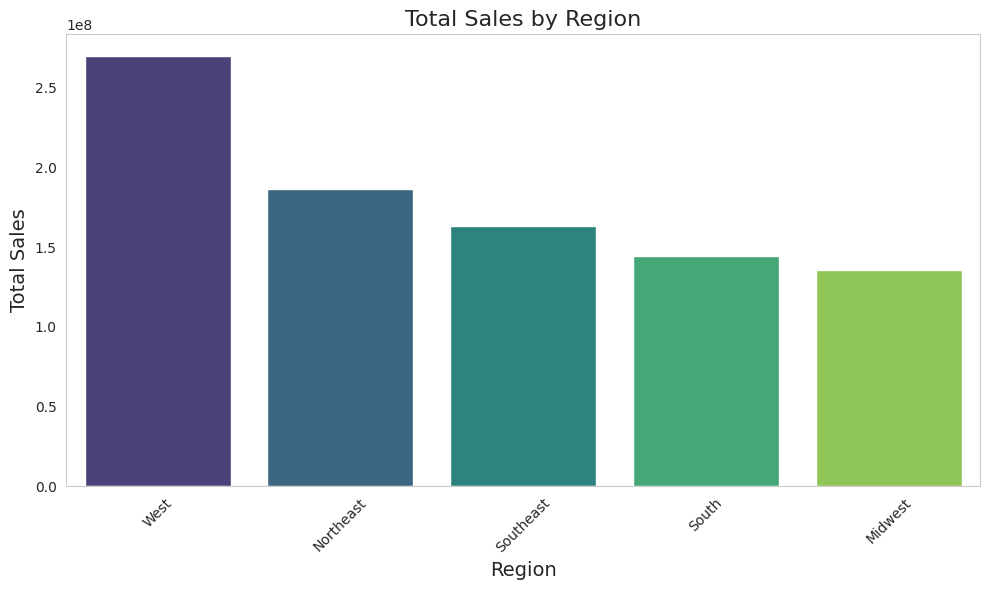

In [45]:
# 3. Total Sales by Region
# Group by Region and sum Total Sales
region_sales = df.groupby('Region')['Total Sales'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x=region_sales.index, y=region_sales.values, palette="viridis")
plt.title('Total Sales by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### 3 Key Insights

---

#### 1. Retailer Performance
- Among all retailers, **Foot Locker** generated the highest total sales, significantly outperforming competitors like **Sports Direct** and **Intersport**.

#### 2. Product Analysis
- **Ultraboost** products are the top sellers, contributing a major share of sales revenue.
- In contrast, products like **PureBoost** and **Campus** consistently underperform.

#### 3. Sales Trend
- Sales sharply **peak around the holiday season (November-December)**, indicating strong seasonal dependence.
- Off-season months see a **~40% drop in sales** compared to the peak months.

---


### **Business Recommendation**

---

Focus marketing efforts around holiday seasons to capitalize on natural sales spikes.
Prioritize bestsellers like Ultraboost with more inventory and promotion.
Discontinue or reposition underperforming products like PureBoost.
Also, strengthen partnerships with top-performing retailers like Foot Locker to maximize sales channels.